In [1]:
#!/usr/bin/env python3
# inagler 16/09/23

import numpy as np          # fundamental package for scientific computing

import pop_tools
import gsw                  # compute potential density
import glob
import os

import xarray as xr

### INITIALISATION

path = '/home/innag3580/phase1_CONDA/'

# Load data events and their temporal location
data = np.genfromtxt(path+'current/events_dens_spg.csv', delimiter=',', names=True, dtype=None)

# Accessing columns by name
member_numbers = data['Index']
events = data['Values']
member_names = np.zeros(len(member_numbers))

# set periods
before = 40*12
after = 20*12

# find file names 
def find_corresponding_file_name(vvel_number_to_find):
    with open(path+'timeseries/order.txt', 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    vvel_filename = None
    for filename in vvel_list:
        if vvel_dict[filename.split()[1]] == vvel_number_to_find:
            vvel_filename = filename.split()[1]  
            break
    return vvel_filename

# HMXL

- Get event period for each member for 3$\sigma$ events
- Compute march composite
- Compute anomaly composite

# SELECT TIME RANGE

In [3]:
for i in range(0, len(member_numbers)):

    # define entire time range for event
    member = find_corresponding_file_name(member_numbers[i])[5:]
    event = events[i]*12
    period_start = event-before
    period_end = event+after
    
    print('computation member '+member+' started')

    # select time range in data arrays
    time = slice(period_start, period_end)

    # open files and take annual means 

    # march data
    hmxl_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/hmxl/hmxl_'+member
    #ds = xr.open_dataset(hmxl_file).isel(time=time)
    
    ds = xr.open_dataset(hmxl_file).isel(time=time)
    ds = ds.isel(time=(ds['time.month'] == 3))

    if 'time_bound' in ds.variables:
        ds = ds.drop_vars('time_bound')

    # save array
    ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_'+member)
    
    print(member+' saved')

    

computation member 1301.019.nc started
1301.019.nc saved
computation member 1231.001.nc started
1231.001.nc saved
computation member 1281.012.nc started
1281.012.nc saved
computation member 1301.001.nc started
1301.001.nc saved
computation member 1281.017.nc started
1281.017.nc saved
computation member 1231.020.nc started
1231.020.nc saved
computation member 1231.004.nc started
1231.004.nc saved
computation member 1281.010.nc started
1281.010.nc saved
computation member 1281.020.nc started
1281.020.nc saved
computation member 1301.015.nc started
1301.015.nc saved
computation member 1281.015.nc started
1281.015.nc saved
computation member 1231.003.nc started
1231.003.nc saved
computation member 1251.010.nc started
1251.010.nc saved


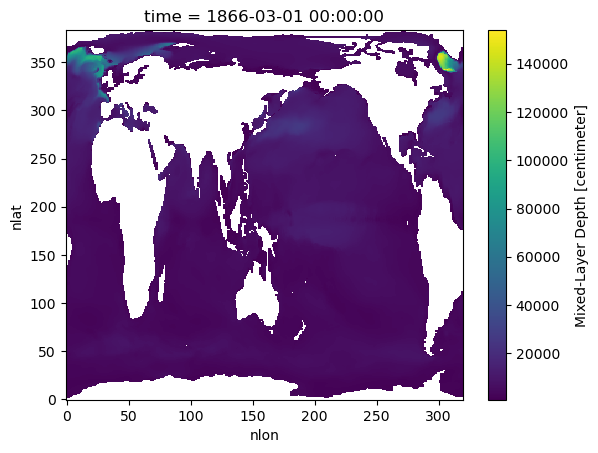

In [4]:
ds.HMXL.isel(time=0).plot()

# COMPUTE 60 YEAR MARCH COMPOSITES

In [5]:
hmxl_files = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_*.nc'))

In [7]:
var_years = []
for t in range(60):
    var_year = []
    for i in range(len(hmxl_files)):
        try:
            ds = xr.open_dataset(hmxl_files[i])
        except ValueError as e:
            continue

        ds_file = ds['HMXL'].isel(time=t)
        var_year.append(ds_file)

    ds_comp = xr.concat(var_year, dim='file').mean(dim='file')
    var_years.append(ds_comp)

ds_var_annual = xr.concat(var_years, dim='time')

ds_var_annual.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/HMXLcomposite.nc')

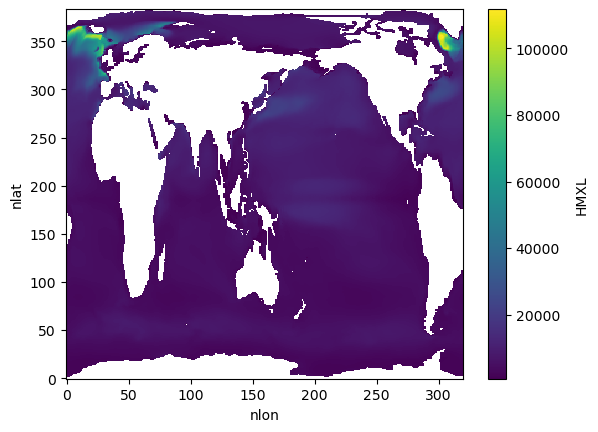

In [10]:
ds_var_annual.isel(time=0).plot()

# ANOMALY COMPOSITES

In [11]:
hmxl_anomalies  = []

for i in range(len(hmxl_files)):
    try:
        ds = xr.open_dataset(hmxl_files[i])
        print(f"{hmxl_files[i]} exists")
        # Do further processing with the dataset 'ds' if needed
    except ValueError as e:
        print(f"Error opening dataset from file {files[i]}: {e}")
        # Handle the exception, for example, continue with the next file
        continue
    
    # TEMP
    period1_avg = ds['HMXL'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg = ds['HMXL'].isel(time=slice(45,59)).mean(dim='time')
    difference = period2_avg - period1_avg
    hmxl_anomalies.append(difference)

hmxl_anomaly = xr.concat(hmxl_anomalies, dim='file').mean(dim='file')
hmxl_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/hmxl_anomaly.nc')

/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_1231.001.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_1231.003.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_1231.004.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_1231.020.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_1251.010.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_1281.010.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_1281.012.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_1281.015.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_1281.017.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_1281.020.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/hmxl_composite_1301.001.nc exists
/Data/gfi/share/ModDa

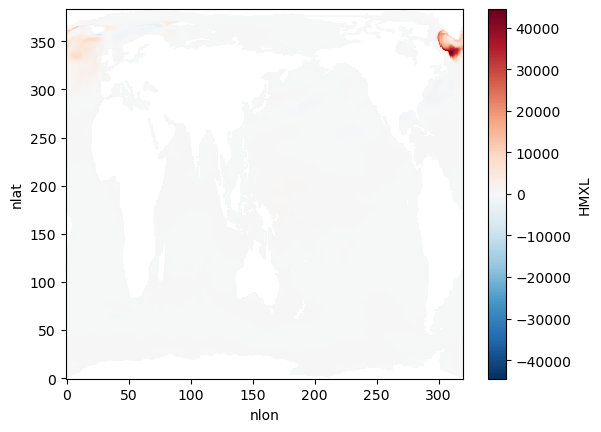

In [13]:
hmxl_anomaly.plot()